In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
pd.option_context('mode.use_inf_as_na', True)

In [3]:
df = pd.read_csv("food_orders_new_delhi.csv")

In [4]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


### Issues 1. Discounts & Offers - Extract the discount percentag.
2. Order Date & Time - change the datatype to Date
3. Delivery Date & Time - change the datatype to Date
4. Discounts & Offers - missing values 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [6]:
df.duplicated().sum()

0

1. OrderValue - More than half of the orders are valued at Rs1038 or less.
2. DeliveryFees - More than half of the orders have delivery fee of Rs30 or less. The std is 16.95 , there is significant variation in delivery cost, this may be due to diferrences in delivery time and distance.
3. Commission Fee - More than half of te commission fees are at Rs127 or less.
4. Refunds/Chargebacks - More than half of the refunds/chargebacks value at 0 or less.

In [8]:
df.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [9]:
# Data Cleaning

In [10]:
# changing datatype int to datetime
df['Order Date and Time'] = pd.to_datetime(df['Order Date and Time'])

In [11]:
# changing datatype int to datetime
df['Delivery Date and Time'] = pd.to_datetime(df['Delivery Date and Time'])

In [12]:
def extract_percent(discount):
    if isinstance(discount,str): # check is used to ensure that the variable discount is a string 
        if 'off' in discount:
            return discount.split(' ')[0]
        if '%' in discount:
            return discount.split('%')[0]
    return 0

df['Discount_%'] = df['Discounts and Offers'].apply(lambda x: extract_percent(x))

In [ ]:
## EDA & Feature Engineering

In [7]:
df.describe()

,Order ID,Order Value,Delivery Fee,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,500.500000,1053.969000,28.620000,126.99000,29.832000,28.300000
std,288.819436,530.975339,16.958278,43.06405,11.627165,49.614228
min,1.000000,104.000000,0.000000,50.00000,10.000000,0.000000
25%,250.750000,597.750000,20.000000,90.00000,20.000000,0.000000
50%,500.500000,1038.500000,30.000000,127.00000,30.000000,0.000000
75%,750.250000,1494.000000,40.000000,164.00000,40.000000,50.000000
max,1000.000000,1995.000000,50.000000,200.00000,50.000000,150.000000


In [13]:
df['Discount_%'] = df['Discount_%'].astype('float')

In [14]:
# calculate discount amount based on discount_percent
df['Discount_Amount'] = df.apply(lambda x: (x['Order Value'] * x['Discount_%'] / 100)
                                 if x['Discount_%'] > 1 
                                 else x['Discount_%'], axis = 1)


# to correctly calculate the discount amount for discount_% 0
df['Discount_Amount'] = df.apply(lambda x: x['Discount_Amount']
                                 if x['Discount_%'] <= 1 
                                 else x['Order Value'] * x['Discount_%'] / 100, axis = 1)

In [15]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount_%,Discount_Amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,0.0,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00


In [16]:
# EDA
# Univariate Analysis

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


-0.008983497574615869

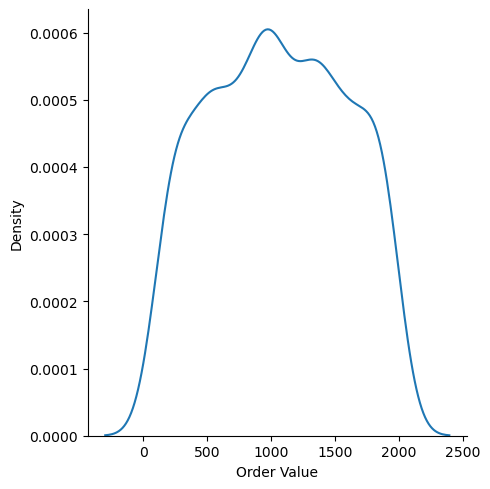

In [17]:
sns.displot(data = df , x = 'Order Value', kind = 'kde')

df['Order Value'].skew()

#### Order Value
1. For all pratical purpose we can consider Order Value normal distribution.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


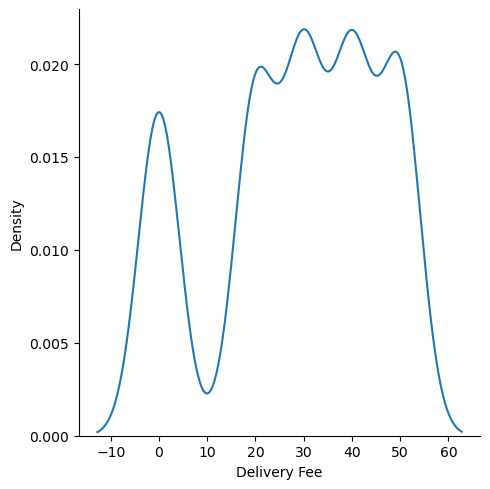

In [18]:
sns.displot(data = df, x = 'Delivery Fee', kind = 'kde')

#### Delivery Fee
1. Delivery fee col is a bimodal distribution.
2. Delivery fee is mostly greater than 10 .

Payment Method
Cash on Delivery    35.7
Credit Card         33.7
Digital Wallet      30.6
Name: count, dtype: float64

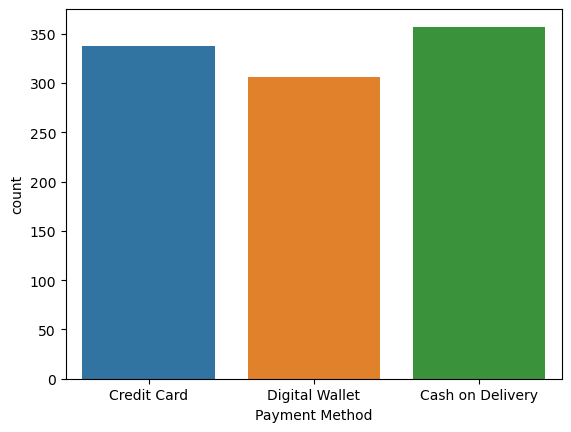

In [19]:
# Payment method

sns.countplot(data = df, x = 'Payment Method')

(df['Payment Method'].value_counts()/1000)*100

#### Payment Method
1. There is not much difference in using payment method. All are used kind of equally.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


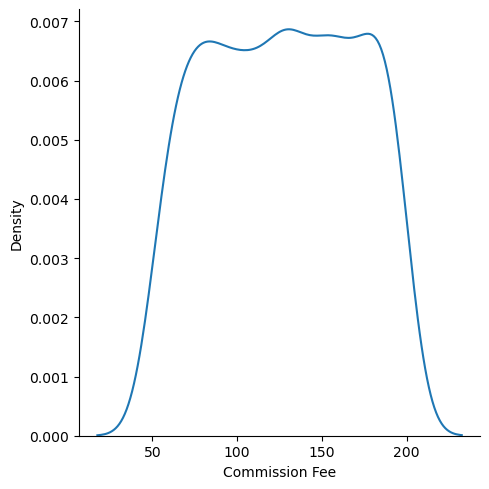

In [20]:
# Commision Fee

sns.displot(data = df, x = 'Commission Fee', kind = 'kde')

#### Commission Fee
1. Commission fee col is closed to normal distribution.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


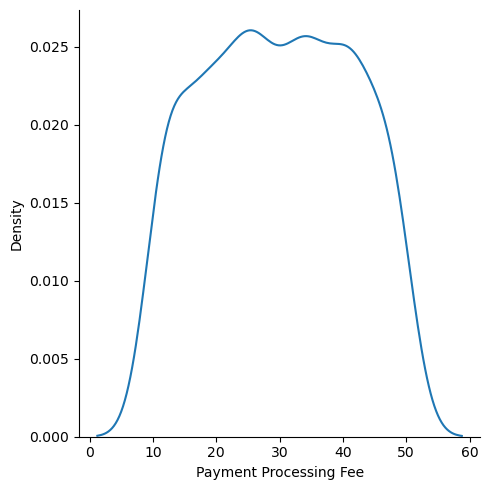

In [21]:
# Payment Processing Fee

sns.displot(data = df, x = 'Payment Processing Fee', kind = 'kde')

#### Payment Processing Fee
1.Payment Processing  fee col is closed to normal distribution.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


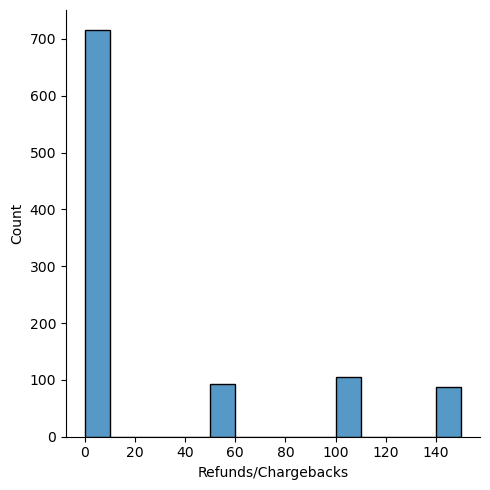

In [22]:
# Refunds/Chargebacks

sns.displot(data = df, x = 'Refunds/Chargebacks')

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


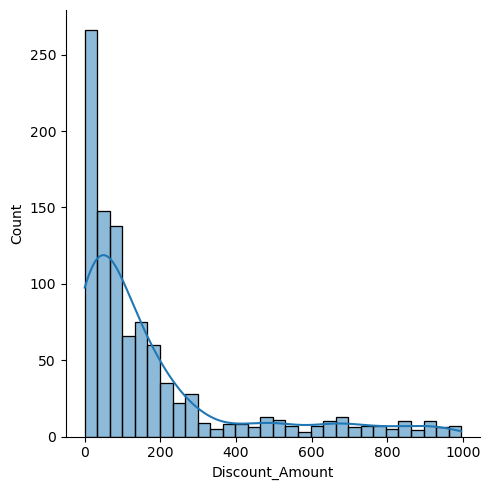

In [23]:
# Discount_Amount

sns.displot(data = df, x = 'Discount_Amount', kde = True)

<Axes: xlabel='Discount_Amount'>

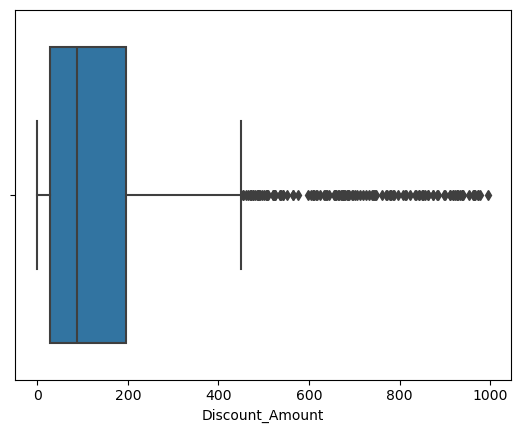

In [24]:
sns.boxplot(data = df, x = 'Discount_Amount')

In [25]:
print("Number of Discount Amount between 800 & 1000", df[(df['Discount_Amount'] <= 400)].shape[0])
print("Number of Discount Amount between 800 & 1000", df[(df['Discount_Amount'] > 400)].shape[0])

Number of Discount Amount between 800 & 1000 861
Number of Discount Amount between 800 & 1000 139


#### Discount_Amount
1. Discount_Amount col is right skewed distribution.
2. Large number of orders have a Discount_Amount close to zero and between zero & 200.
3. Less number of orders have high Discount_Amount.
4. Outliers are there.

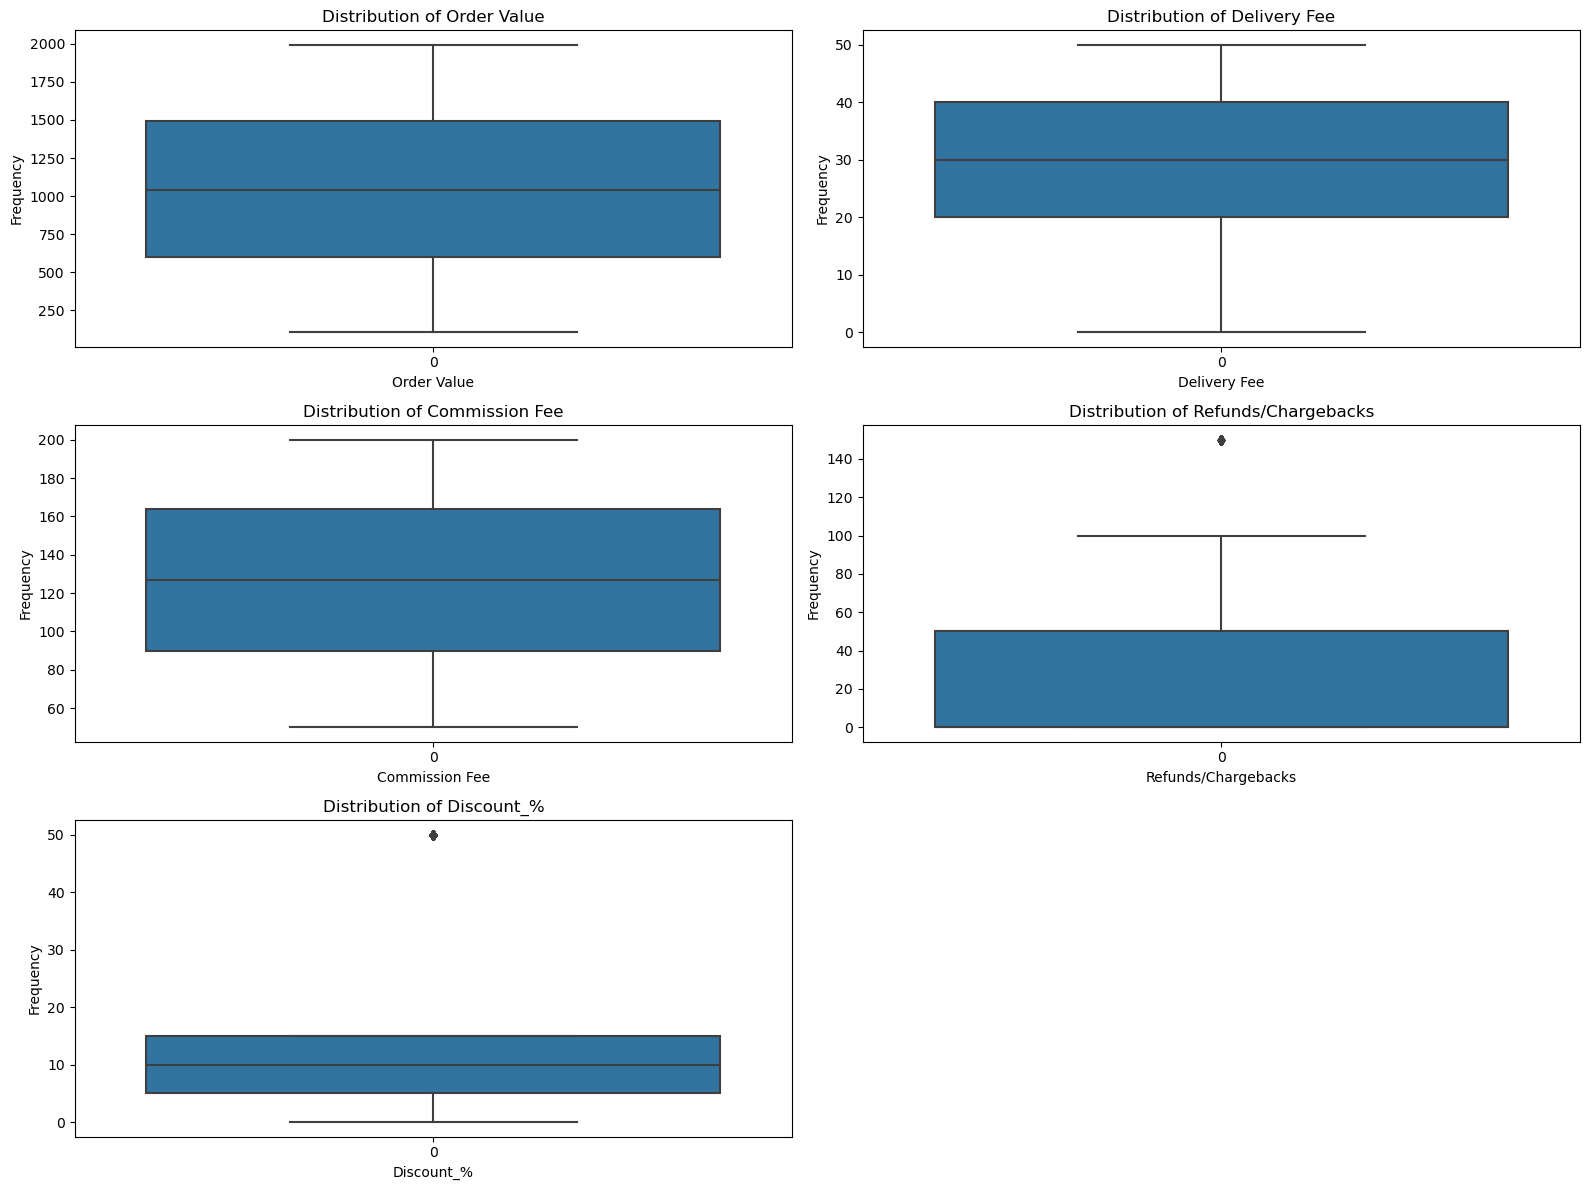

In [26]:
columns = ['Order Value', 'Delivery Fee','Commission Fee', 'Refunds/Chargebacks','Discount_%']
fig, ax = plt.subplots(3,2, figsize = (16,12))
ax = ax.flatten()

for i,col in enumerate(columns):
    sns.boxplot(data = df[col], ax = ax[i])
    ax[i].set_title(f'Distribution of {col}')
    ax[i].set_xlabel(col)
    ax[i].set_ylabel('Frequency')

fig.delaxes(ax[-1])
plt.tight_layout()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

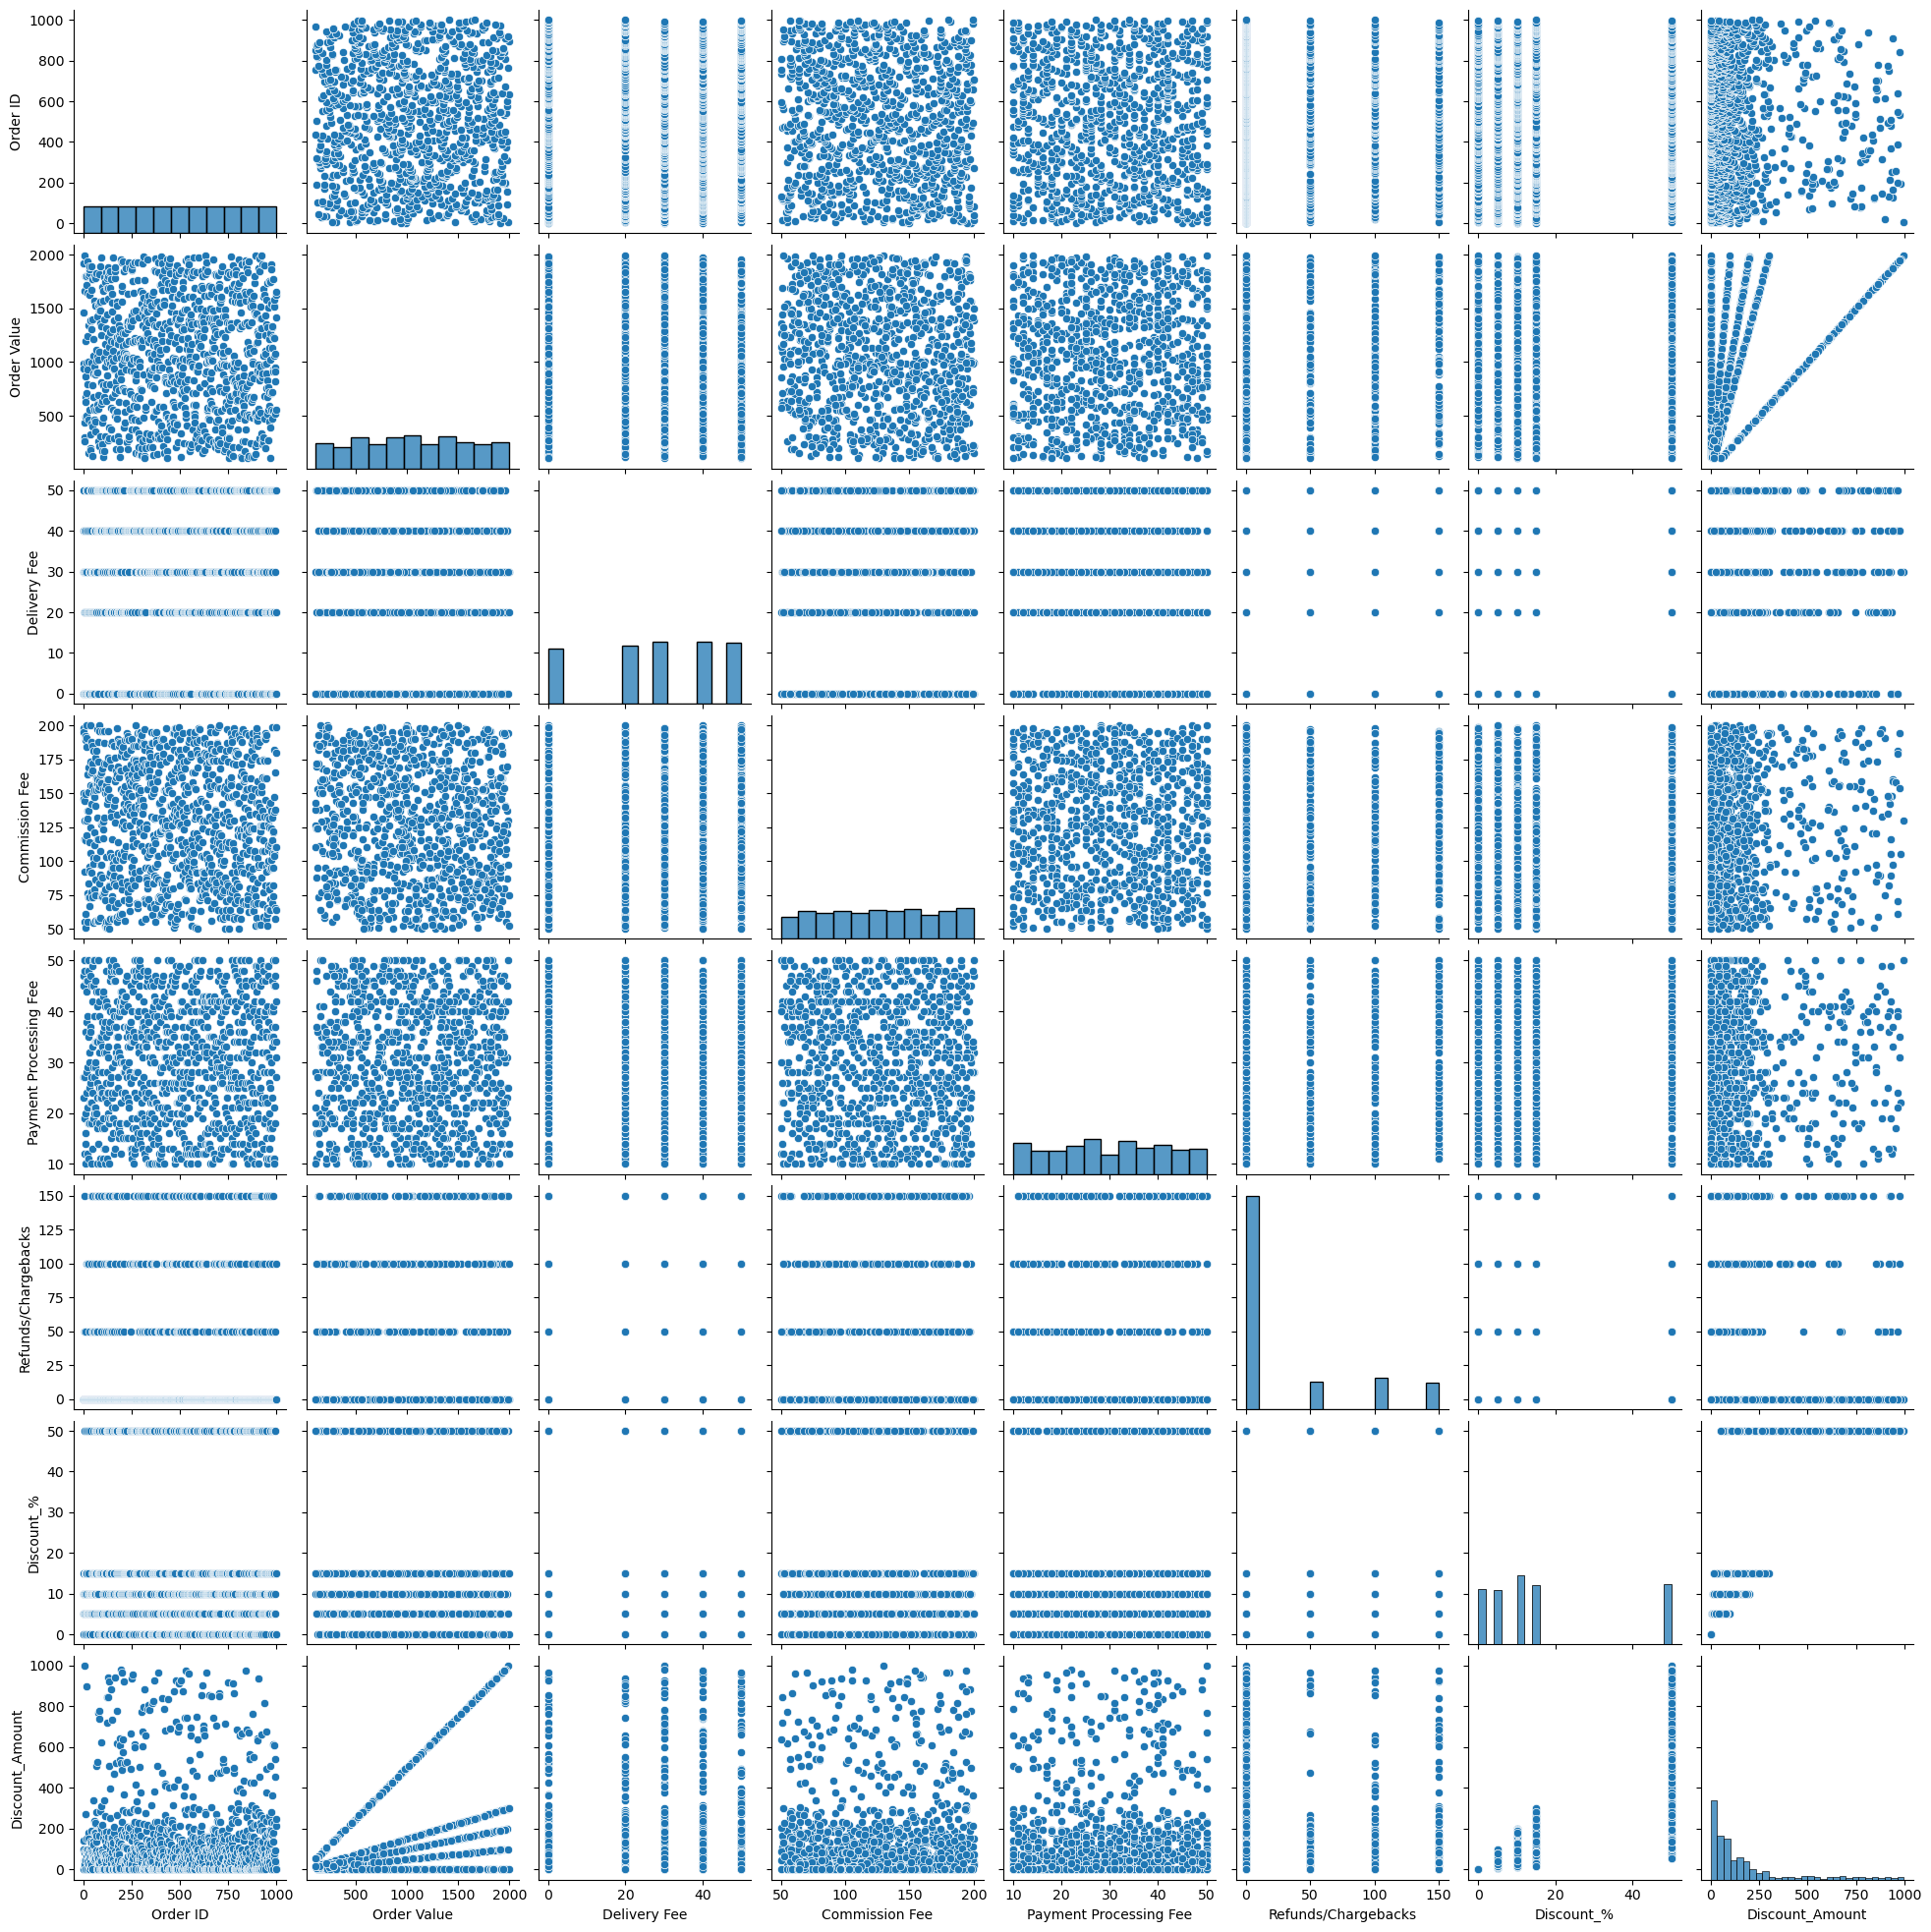

In [27]:
sns.pairplot(df)

1. Order Value data have heavy tails, indicating few high order values. Most data falls between 500 and 1500.
2. Commission Fee data have heavy tails.
3. Delivery Fee is closed to bimodal distribution with peaks above 10 
4. Refunds/Chargebacks - There are majority of values with no refunds and chargebacks. It is right-skewed data.
5. Discount_% is closed to bimodal distribution with peaks at 50 and 10.

1. There are no outliers in order value, commission fee, delivery fee.
2. There are outlier in Refunds/Chargebacks and Discount_%.

<Axes: xlabel='Order Value', ylabel='Delivery Fee'>

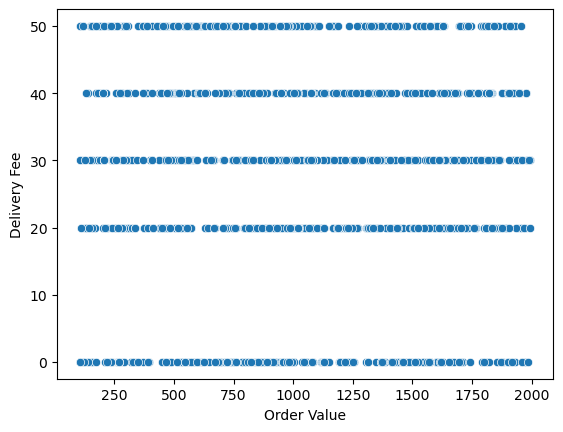

In [28]:
# Multivariate Analysis
# Order Value vs. Delivery Fee

sns.scatterplot(data = df, x = 'Order Value', y = 'Delivery Fee')

#### Order Value vs. Delivery Fee
1.The Delivery Fee does not change gradually with Order Value

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a len

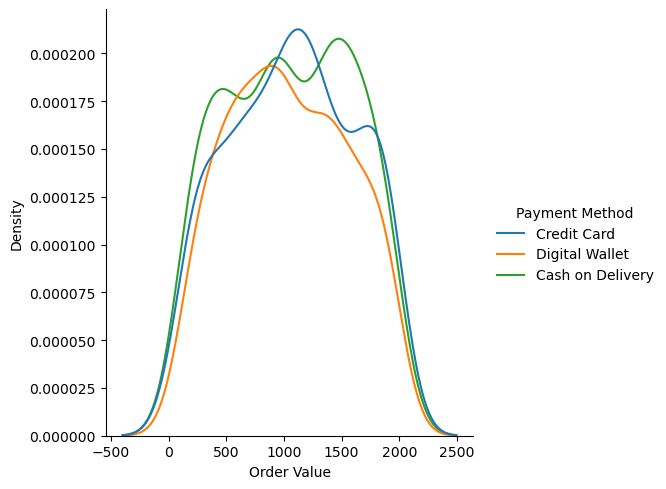

In [29]:
# Order Value vs. Payment Method
sns.displot(data = df, x = 'Order Value', hue = 'Payment Method', kind = 'kde')

#### Order Value vs. Payment Method
1. The density for Credit Card and Digital Wallet is higher around the peak compared to Cash on Delivery, suggesting a higher concentration of order values around 1000 for these methods

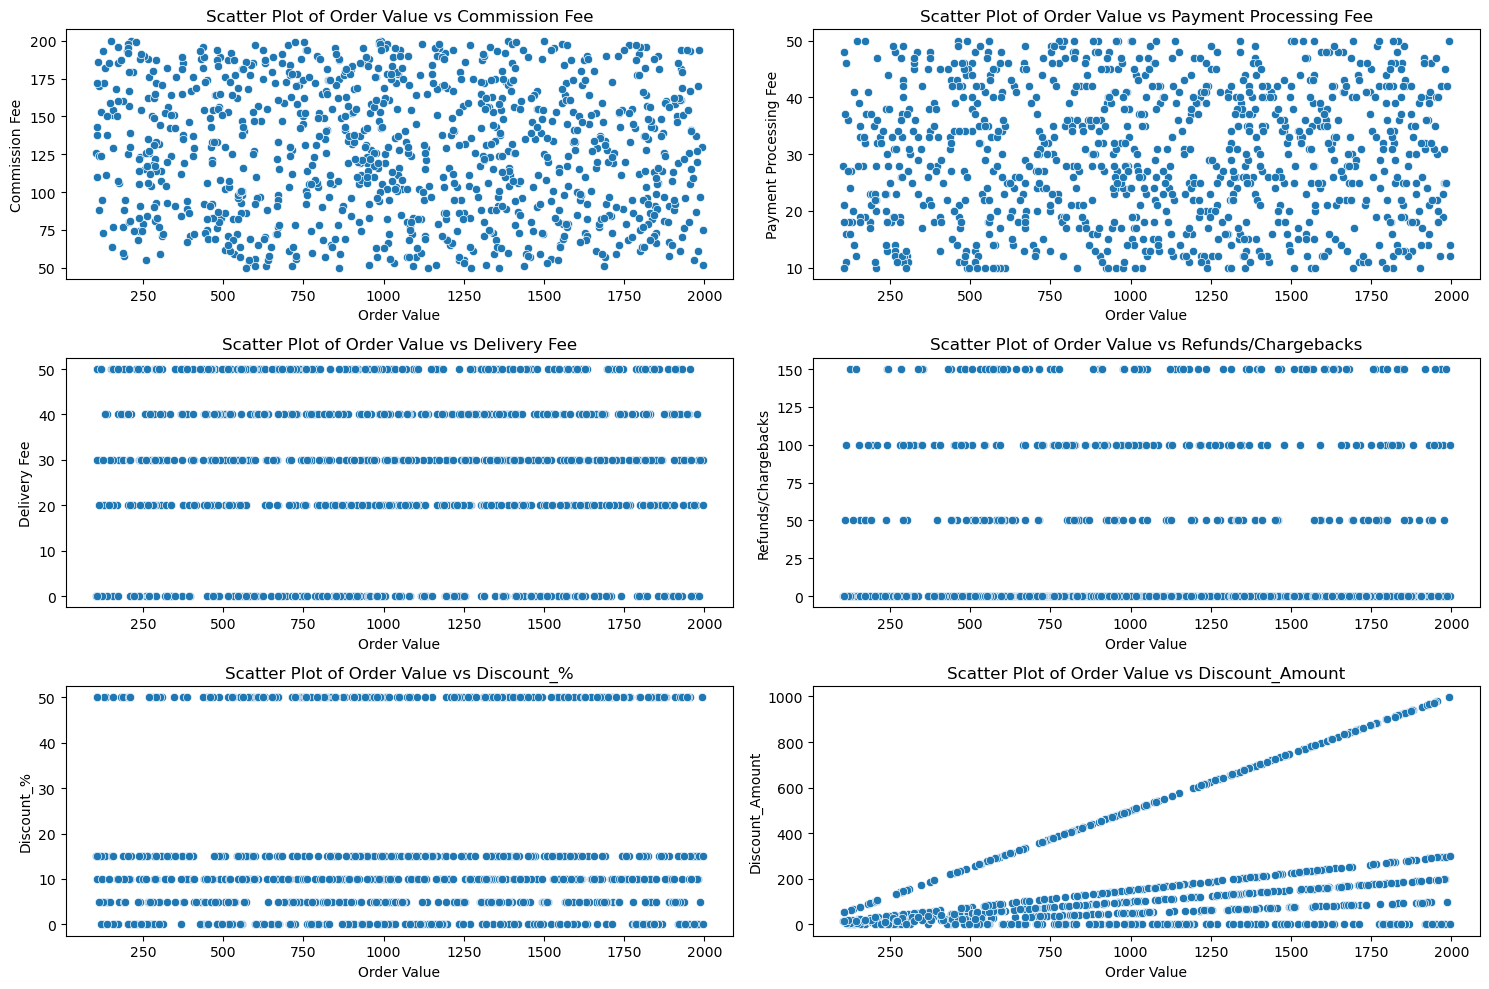

In [30]:
# Order Value vs. Delivery Fee
columns_to_plot = ['Commission Fee', 'Payment Processing Fee', 'Delivery Fee', 'Refunds/Chargebacks', 'Discount_%', 'Discount_Amount']

fig, ax = plt.subplots(3,2, figsize = (15,10))

ax = ax.flatten()

for i ,columns in enumerate(columns_to_plot):
    if columns in df.columns:
         sns.scatterplot(data=df, x='Order Value', y=columns, ax=ax[i])
         ax[i].set_title(f'Scatter Plot of Order Value vs {columns}')
         ax[i].set_xlabel('Order Value')
         ax[i].set_ylabel(columns)

plt.tight_layout()
plt.show()

#### Conclusion
1. There appears to be a positive correlation between Order Value and Discount Amount, indicating that higher order values tend to receive higher discounts.
2. Some points are significantly distant from the majority of the data, which could indicate outliers or special discount cases.

In [31]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount_%,Discount_Amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,0.0,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00


<Axes: >

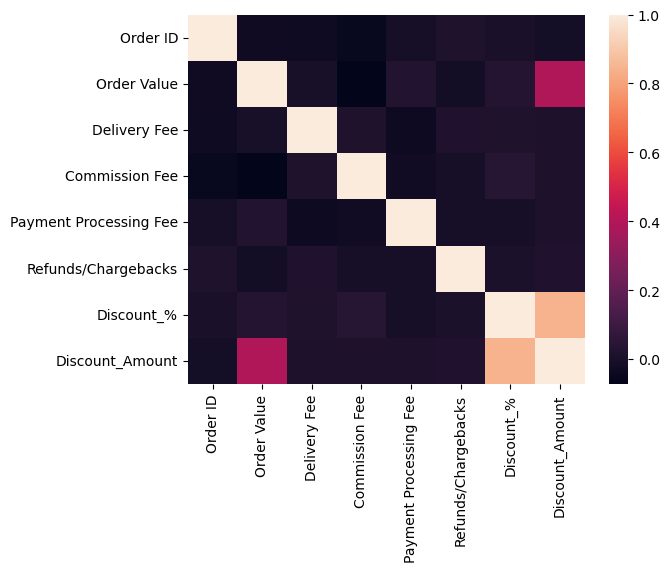

In [32]:
sns.heatmap(df.corr(numeric_only = True))

In [33]:
# drop Discounts and Offers col

df.drop(columns = 'Discounts and Offers', inplace = True)

In [34]:
df.to_excel("orders.xlsx")

In [35]:
# unique customers
df['Customer ID'].nunique()

947

In [36]:
# total order value
df['Order Value'].sum()

1053969

In [37]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount_%,Discount_Amount
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,150,47,0,5.0,95.70
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,198,23,0,10.0,98.60
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,195,45,0,15.0,140.55
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,146,27,0,0.0,0.00
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,130,50,0,50.0,996.00


In [38]:
# total cost and revenue per order

df['Total Costs'] = df['Delivery Fee'] + df['Payment Processing Fee'] + df['Discount_Amount']
df['Revenue'] = df['Commission Fee']
df['Profit'] = df['Revenue'] - df['Total Costs']

# aggregate
total_orders = df.shape[0]
total_revenue = df['Revenue'].sum()
total_costs = df['Total Costs'].sum()
total_profit = df['Profit'].sum()

# overall metrics
Overall_metrics = {
    "Total Orders" : total_orders,
    "Toatl Revenue" : total_revenue,
    "Total Cost" : total_costs,
    "Toatl Profit" : total_profit
}

print(Overall_metrics)

{'Total Orders': 1000, 'Toatl Revenue': 126990, 'Total Cost': 232709.85, 'Toatl Profit': -105719.85}


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


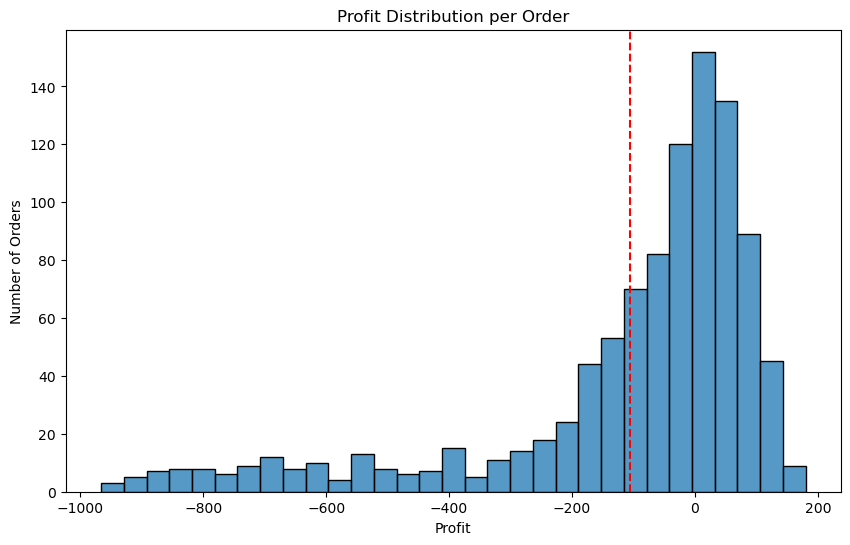

In [39]:
# Profit distribution

plt.figure(figsize = (10,6))
sns.histplot(data = df, x = 'Profit',)
plt.title("Profit Distribution per Order")
plt.ylabel("Number of Orders")
plt.axvline(df['Profit'].mean(), color = 'red', linestyle = 'dashed')
plt.show()

In [40]:
print("Number of orders greater than profit 100", df[df['Profit'] >= 100 ].shape[0])
print("Number of orders between 0 & 100 ", df[(df['Profit'] > 0) & (df['Profit'] < 100) ].shape[0])
print("Number of orders less than profit 0", df[df['Profit'] < 0 ].shape[0])

Number of orders greater than profit 100 72
Number of orders between 0 & 100  343
Number of orders less than profit 0 584


In [41]:
print("Number of orders less than profit 0", df[df['Profit'] < 200 ].shape[0])

Number of orders less than profit 0 1000


In [42]:
df['Profit'].mean()

-105.71985000000001

#### conclusion
1. The avg profit is -105.71
2. High number of orders have profit between 0 & 100. Very few orders have profit greater than 100.
3. A very high number of orders have no profit.
4. The distribution is highly skewed.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


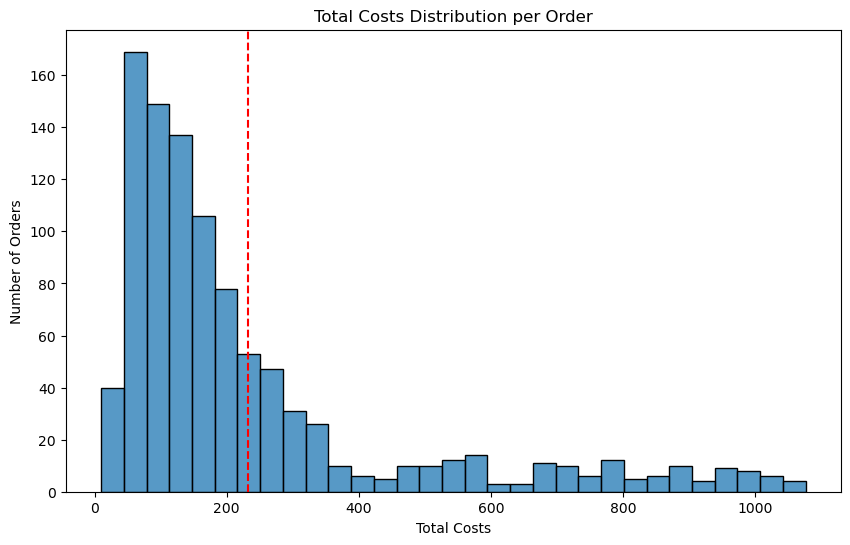

In [43]:
# Total Costs

plt.figure(figsize = (10,6))
sns.histplot(data = df, x = 'Total Costs')
plt.title("Total Costs Distribution per Order")
plt.ylabel("Number of Orders")
plt.axvline(df['Total Costs'].mean(), color = 'red', linestyle = 'dashed')
plt.show()

##### conlusion
1. High number of orders have high costs associated.
2. The distribution is wide spread and is heavily right skewed.

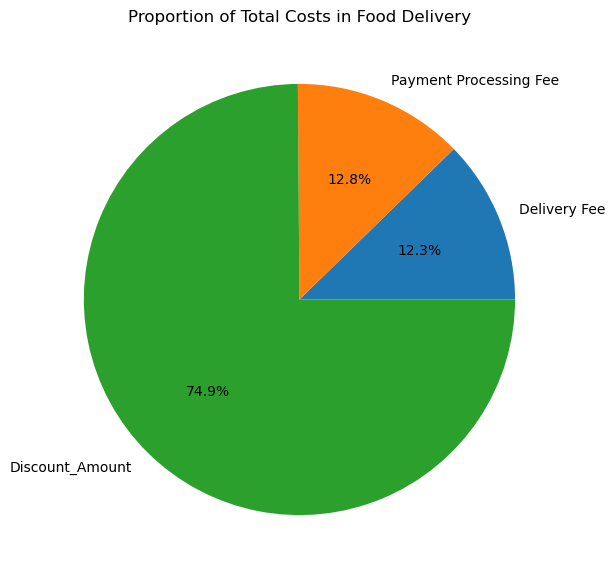

In [44]:
# Costs breakdown

costs = df[['Delivery Fee','Payment Processing Fee','Discount_Amount']].sum()
plt.figure(figsize = (7,7))
plt.pie(costs, labels = costs.index, autopct='%1.1f%%')
plt.title("Proportion of Total Costs in Food Delivery")
plt.show()

##### conclusion
1. Discount constitutes a significant proportion of costs, suggesting that promotional strategies, and offers might be heavily impact overall profitability.

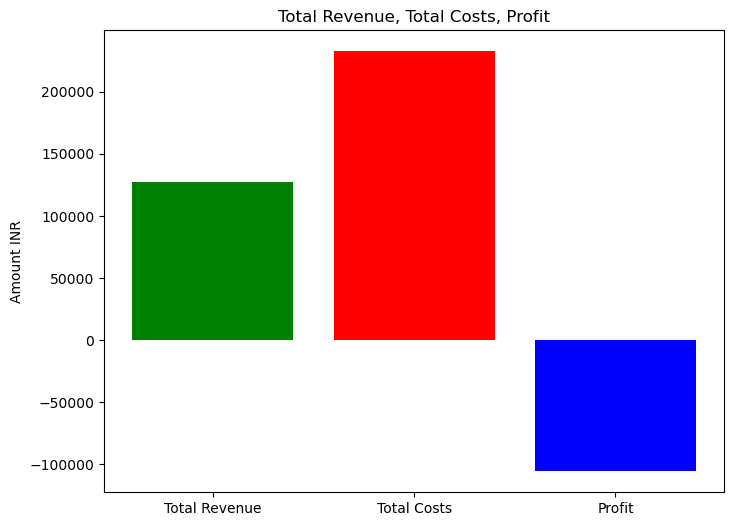

In [45]:
# bar chart for total revenue, total_costs, profit

totals = ['Total Revenue', 'Total Costs', 'Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize = (8,6))
plt.bar(totals, values, color = ['green','red','blue'])
plt.title("Total Revenue, Total Costs, Profit")
plt.ylabel("Amount INR")
plt.show()

##### conclusion
1. The chart clearly shows that the total costs surpass the total revenue.

In [46]:
# Processing Fee vs. Payment Method

pivot_table = df.pivot_table(
    values='Payment Processing Fee',
    index='Payment Method',
    aggfunc='sum'
)

# Display the pivot table
print(pivot_table)

                  Payment Processing Fee
Payment Method                          
Cash on Delivery                   10704
Credit Card                        10072
Digital Wallet                      9056


##### **Conclusion**
1. Payment through Cash on Delivery is incurring the highest processing fee among the payment methods, followed by credit card.
2. Payment through Digital Wallet incurs the lowest processing fee compared to Cash on Delivery and Credit Card.

## **Strategy to reduce total costs**

From the analysis of payment method and their processing fee we can see that the processing fee for Cash on delivery and Credit Card is around 5% and for Digital wallet is 4.19.

By introducing another new payment method with a lower processing fee and promoting it we might reduce the total cost and potentially increase profitability.

##### Payment Processing fee percentage calculations per order

In [47]:

df_copy = df.copy()

## filter the rows for cash on delivery 
processing_fees_cod = df_copy[df_copy['Payment Method'] == 'Cash on Delivery']

# calculate processing_fee_percent 
processing_fees_cod.loc[:, 'ProcessingFee_percent'] = (processing_fees_cod['Payment Processing Fee'] / processing_fees_cod['Order Value']) * 100
processing_fees = round(processing_fees_cod['ProcessingFee_percent'].mean(),2)

print("Processing Fee Percent for Cash on Delivery - ",processing_fees)

# processing fee percentage calculations for credit card 
## filter data for Credit Card 
processing_fees_cd = df_copy[df_copy['Payment Method'] == 'Credit Card']
processing_fees_cd.loc[:, 'ProcessingFee_percent'] = (processing_fees_cd['Payment Processing Fee'] / processing_fees_cd['Order Value']) * 100
processing_feescd = round(processing_fees_cd['ProcessingFee_percent'].mean(),2)

print("Processing Fee Percent for Credit Card - ",processing_feescd)

# processing fee percentage calculations digital wallet
## filter data for digital wallet 
processing_fees_dw = df_copy[df_copy['Payment Method'] == 'Digital Wallet']
processing_fees_dw.loc[:, 'ProcessingFee_percent'] = (processing_fees_dw['Payment Processing Fee'] / processing_fees_dw['Order Value']) * 100
processing_feesd = round(processing_fees_dw['ProcessingFee_percent'].mean(),2)

print("Processing Fee Percent for Credit Card - ",processing_feesd)

Processing Fee Percent for Cash on Delivery -  4.54
Processing Fee Percent for Credit Card -  4.54
Processing Fee Percent for Credit Card -  4.19


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6240\3927517013.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processing_fees_cod.loc[:, 'ProcessingFee_percent'] = (processing_fees_cod['Payment Processing Fee'] / processing_fees_cod['Order Value']) * 100
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6240\3927517013.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  processing_fees_cd.loc[:, 'ProcessingFee_percent'] = (processing_fees_cd['Payment Processing Fee'] / processing_fees_cd['Order Value']) * 10

##### **Conclusion**
1. We can introduce **Unified Payments Interface (UPI)** a popular payment method in India that facilitates instant real-time payment transactions.UPI transactions generally have very low processing fees for merchants.
2. Generally, the fees can range from **0% to 0.3%** per transaction, often capped at a small maximum amount (e.g., ₹5-10).

In [48]:
# filter the dataset for profitable orders
df_copy = df.copy()
orders = df_copy

# calculate the avg commission fee percentage for profitable orders
orders['Commission Percentage'] = (orders['Commission Fee'] / orders['Order Value'])*100

# calculate the avg discount percentage for profitable orders
orders['Discount Percentage'] = (orders['Discount_Amount'] / orders['Order Value'])*100

old_avg_commission_percentage = round(orders['Commission Percentage'].mean(),2)
old_avg_discount_percentage = round(orders['Discount Percentage'].mean(),2)

print("Old_avg_commission_percentage - ",old_avg_commission_percentage)
print("Old_avg_discount_percentage - " ,old_avg_discount_percentage)

Old_avg_commission_percentage -  19.75
Old_avg_discount_percentage -  16.26


##### Conclusion
1. The old commission percentage is 19.75.
2. The old discount percentage is 16.26.
3. We can see the average discount percentage is quiet high which is resulting in losses.

## **New Strategy for Profits**

From the analysis we can see that the discounts on the food orders are resulting in huge losses. We need to find a sweet spot for offering discounts and charging commissions. To find a sweet spot for commission and discount percentages, we can analyze the characteristics of profitable orders more deeply. 
1) A new average commission percentage based on profitable order.
2) A new average discount percentage for profitable orders.

Given these new averages, we can suggest adjustments that might not only make individual orders profitable but also apply broadly across all orders to improve overall profitability.ty.

In [49]:
# calculate new commission percentage and discount percentage

# filter the dataset for profitable orders
profitable_orders = df[df['Profit'] > 0]

# calculate the avg commission fee percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value'])*100

# calculate the avg discount percentage for profitable orders
profitable_orders['Discount Percentage'] = (profitable_orders['Discount_Amount'] / profitable_orders['Order Value'])*100

new_avg_commission_percentage = round(profitable_orders['Commission Percentage'].mean(),2)
new_age_discount_percentage = round(profitable_orders['Discount Percentage'].mean(),2)

print("new_avg_commission_percentage - ",new_avg_commission_percentage)
print("new_age_discount_percentage - " ,new_age_discount_percentage)

new_avg_commission_percentage -  30.51
new_age_discount_percentage -  5.87


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6240\1088505716.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value'])*100
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6240\1088505716.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Discount Percentage'] = (profitable_orders['Discount_Amount'] / profitable_orders['Order Value'])*100


##### **Conclusion**
1. The avg commission percentage for profitable orders is 30.50
2. The avg discount percentage for profitable orders is 5.87
3. The average commission percentage for profitable orders is significantly higher than the overall average across orders and the average discount percentage for profitable orders is quiet lower, indicating higher commission % and lower discount % might contribute to profitability without deterring the order volumne.

Based on this analysis,  a strategy that aims for a commission  rate closer to **31%** and a discount rate around **6%** could potentially improve profitability.

#### Visualize a comparison of profitability using actual versus recommended discounts % and commission % across orders

In [50]:
new_avg_commission_percentage = 30.51
new_avg_discount_percentage = 6

# calculate the simulated commission fee and discount amount using recommended percentages
df['Simulated Commission Fee'] = df['Order Value'] * (new_avg_commission_percentage / 100)
df['Simulated Discount Amount'] = df['Order Value'] * (new_avg_discount_percentage / 100)

# total cost and profit with simulated values
df['Simulated Total Costs'] = (df['Delivery Fee'] + df['Payment Processing Fee'] + df['Simulated Discount Amount'])

df['Simulated Profit'] = (df['Simulated Commission Fee']  - df['Simulated Total Costs'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


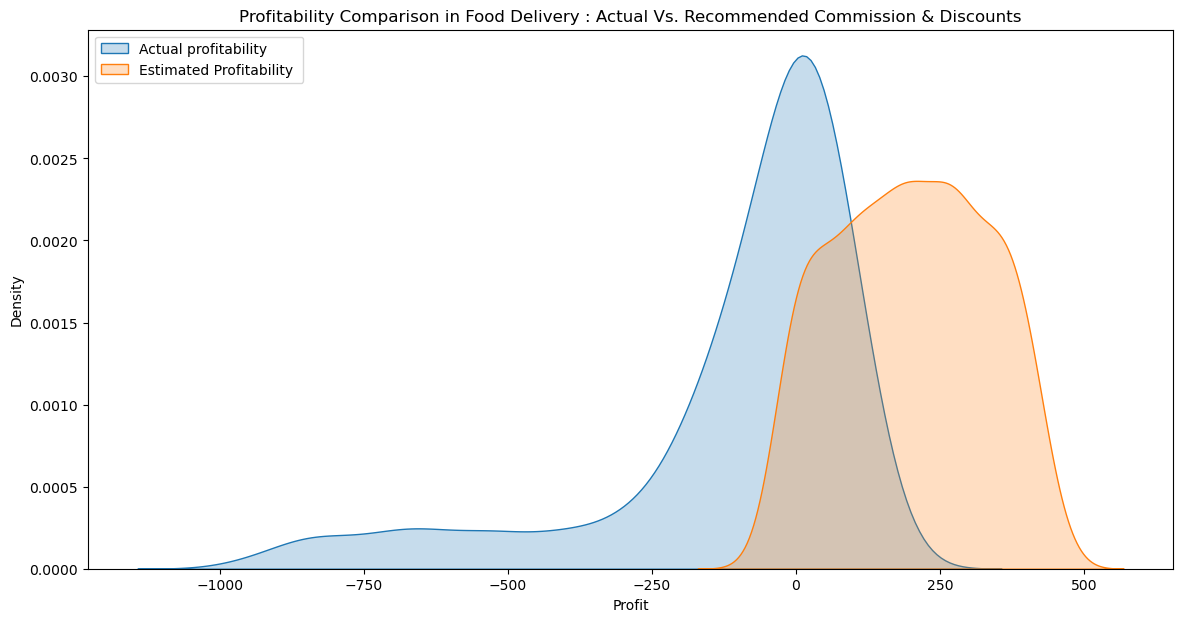

In [51]:
# actual profitability
plt.figure(figsize = (14,7))
sns.kdeplot(df['Profit'], label = 'Actual profitability', fill = True)

# estimated profitability
sns.kdeplot(df['Simulated Profit'], label = 'Estimated Profitability ', fill = True)

plt.title("Profitability Comparison in Food Delivery : Actual Vs. Recommended Commission & Discounts")
plt.xlabel("Profit")
plt.ylabel("Density")
plt.legend(loc = 'upper left')

##### Conclusion
1. We can see there is right shift (positive) in the recommended data compare to the actual data indicating recommended values could lead to a higher profitability.
2. There are very less orders with loss and high orders with values greater than 0.

In [52]:
df.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount_%,Discount_Amount,Total Costs,Revenue,Profit,Simulated Commission Fee,Simulated Discount Amount,Simulated Total Costs,Simulated Profit
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,150,47,0,5.0,95.70,142.70,150,7.30,583.9614,114.84,161.84,422.1214
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,198,23,0,10.0,98.60,161.60,198,36.40,300.8286,59.16,122.16,178.6686
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,195,45,0,15.0,140.55,215.55,195,-20.55,285.8787,56.22,131.22,154.6587
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,146,27,0,0.0,0.00,77.00,146,69.00,446.3613,87.78,164.78,281.5813
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,130,50,0,50.0,996.00,1076.00,130,-946.00,607.7592,119.52,199.52,408.2392
